In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from random import shuffle
from utils import *
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
cars = []
notcars = []

extra_notcars_images = glob.glob('dataset/non-vehicles/Extras/*.png')
for image in extra_notcars_images:
    notcars.append(image)
    
    
gti_notcars_images = glob.glob('dataset/non-vehicles/GTI/*.png')
for image in gti_notcars_images:
    notcars.append(image)
    

gti_far_cars_images = glob.glob('dataset/vehicles/GTI_Far/*.png')
for image in gti_far_cars_images:
    cars.append(image)


gti_left_cars_images = glob.glob('dataset/vehicles/GTI_Left/*.png')
for image in gti_left_cars_images:
    cars.append(image)


gti_middleclose_cars_images = glob.glob('dataset/vehicles/GTI_MiddleClose/*.png')
for image in gti_middleclose_cars_images:
    cars.append(image)


gti_right_cars_images = glob.glob('dataset/vehicles/GTI_Right/*.png')
for image in gti_right_cars_images:
    cars.append(image)


kitti_cars_images = glob.glob('dataset/vehicles/KITTI_extracted/*.png')
for image in kitti_cars_images:
    cars.append(image)


sample_size = 100
shuffle(cars)
shuffle(notcars)
cars = cars[0:sample_size]
notcars = notcars[0:sample_size]
data_info = data_look(cars, notcars)

print('Your function returned a count of',
      data_info["n_cars"], ' cars and',
      data_info["n_notcars"], ' non-cars')
print('of size: ', data_info["image_shape"], ' and data type:',
      data_info["data_type"])

Your function returned a count of 100  cars and 100  non-cars
of size:  (64, 64, 3)  and data type: float32


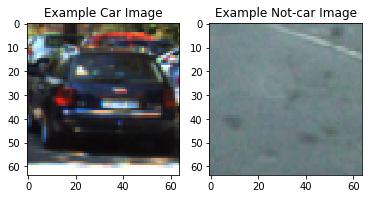

In [3]:
# Just for fun choose random car / not-car indices and plot example images
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))

# Read in car / not-car images
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])


# Plot the examples
fig = plt.figure(figsize=(6, 4))
visualize(fig, 1, 2, [car_image, notcar_image],
          ['Example Car Image', 'Example Not-car Image'],
          ['gray', 'gray'])

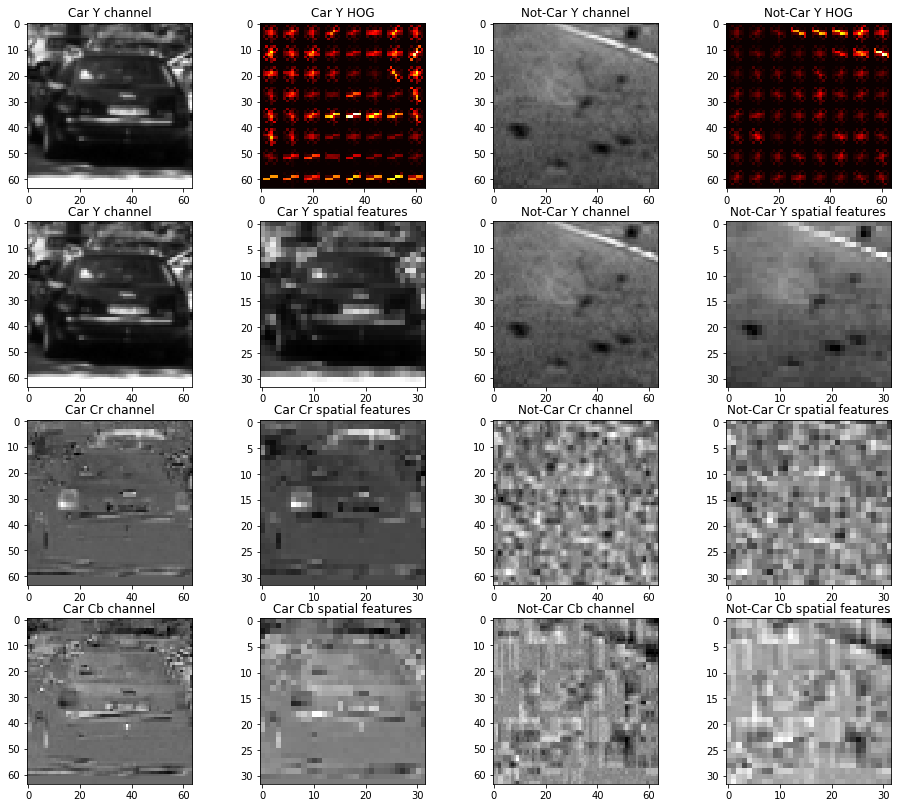

In [4]:
orient = hog_params["orient"]
pix_per_cell = hog_params["pix_per_cell"]
cell_per_block = hog_params["cell_per_block"]
spatial_size = hog_params["spatial_size"]

car_feature_image = cv2.cvtColor(car_image, cv2.COLOR_RGB2YCrCb)
car_Y_channel = car_feature_image[:,:,0]
car_Cr_channel = car_feature_image[:,:,1]
car_Cb_channel = car_feature_image[:,:,2]
# Call our function with vis=True to see an image output
car_Y_features, car_Y_hog_image = get_hog_features(car_Y_channel, orient=orient,
                                       pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                                       vis=True, feature_vec=True)
car_Cr_features = get_hog_features(car_Cr_channel, orient=orient,
                                       pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                                       vis=False, feature_vec=True)
car_Cb_features = get_hog_features(car_Cb_channel, orient=orient,
                                       pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                                       vis=False, feature_vec=True)
car_spatial_Y_feature = bin_spatial(car_Y_channel, spatial_size)
car_spatial_Cr_feature = bin_spatial(car_Cr_channel, spatial_size)
car_spatial_Cb_feature = bin_spatial(car_Cb_channel, spatial_size)

notcar_feature_image = cv2.cvtColor(notcar_image, cv2.COLOR_RGB2YCrCb)
notcar_Y_channel = notcar_feature_image[:,:,0]
notcar_Cr_channel = notcar_feature_image[:,:,1]
notcar_Cb_channel = notcar_feature_image[:,:,2]
# Call our function with vis=True to see an image output
notcar_Y_features, notcar_Y_hog_image = get_hog_features(notcar_Y_channel, orient=orient,
                                       pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                                       vis=True, feature_vec=True)
notcar_Cr_features = get_hog_features(notcar_Cr_channel, orient=orient,
                                       pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                                       vis=False, feature_vec=True)
notcar_Cb_features = get_hog_features(notcar_Cb_channel, orient=orient,
                                       pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                                       vis=False, feature_vec=True)
notcar_spatial_Y_feature = bin_spatial(notcar_Y_channel, spatial_size)
notcar_spatial_Cr_feature = bin_spatial(notcar_Cr_channel, spatial_size)
notcar_spatial_Cb_feature = bin_spatial(notcar_Cb_channel, spatial_size)

fig = plt.figure(figsize=(16, 14))
vis_img_list = [car_Y_channel, car_Y_hog_image, notcar_Y_channel, notcar_Y_hog_image,
                car_Y_channel, car_spatial_Y_feature.reshape(spatial_size), notcar_Y_channel, notcar_spatial_Y_feature.reshape(spatial_size),
                car_Cr_channel, car_spatial_Cr_feature.reshape(spatial_size), notcar_Cr_channel, notcar_spatial_Cr_feature.reshape(spatial_size),
                car_Cb_channel, car_spatial_Cb_feature.reshape(spatial_size), notcar_Cb_channel, notcar_spatial_Cb_feature.reshape(spatial_size)]
vis_title_list = ['Car Y channel', 'Car Y HOG', 'Not-Car Y channel', 'Not-Car Y HOG',
                  'Car Y channel', 'Car Y spatial features', 'Not-Car Y channel', 'Not-Car Y spatial features',
                  'Car Cr channel', 'Car Cr spatial features', 'Not-Car Cr channel', 'Not-Car Cr spatial features',
                  'Car Cb channel', 'Car Cb spatial features', 'Not-Car Cb channel', 'Not-Car Cb spatial features']
cmap_list = ['gray', 'hot', 'gray', 'hot',
             'gray', 'gray', 'gray', 'gray',
             'gray', 'gray', 'gray', 'gray',
             'gray', 'gray', 'gray', 'gray']
visualize(fig, 4, 4, vis_img_list, vis_title_list, cmap_list)

In [5]:
import pickle
from utils import *

svm_model = pickle.load(open("svm_model.p", "rb"))
svc = svm_model["svc"]
X_scaler = svm_model["X_scaler"]

0.0 1.0
0.596611499786377 seconds to process one image searching 57 windows
0.0 1.0
0.4351820945739746 seconds to process one image searching 57 windows
0.0 1.0
0.44818758964538574 seconds to process one image searching 57 windows
0.0 1.0
0.45195841789245605 seconds to process one image searching 57 windows
0.0 1.0
0.4371602535247803 seconds to process one image searching 57 windows
0.0 1.0
0.4391977787017822 seconds to process one image searching 57 windows


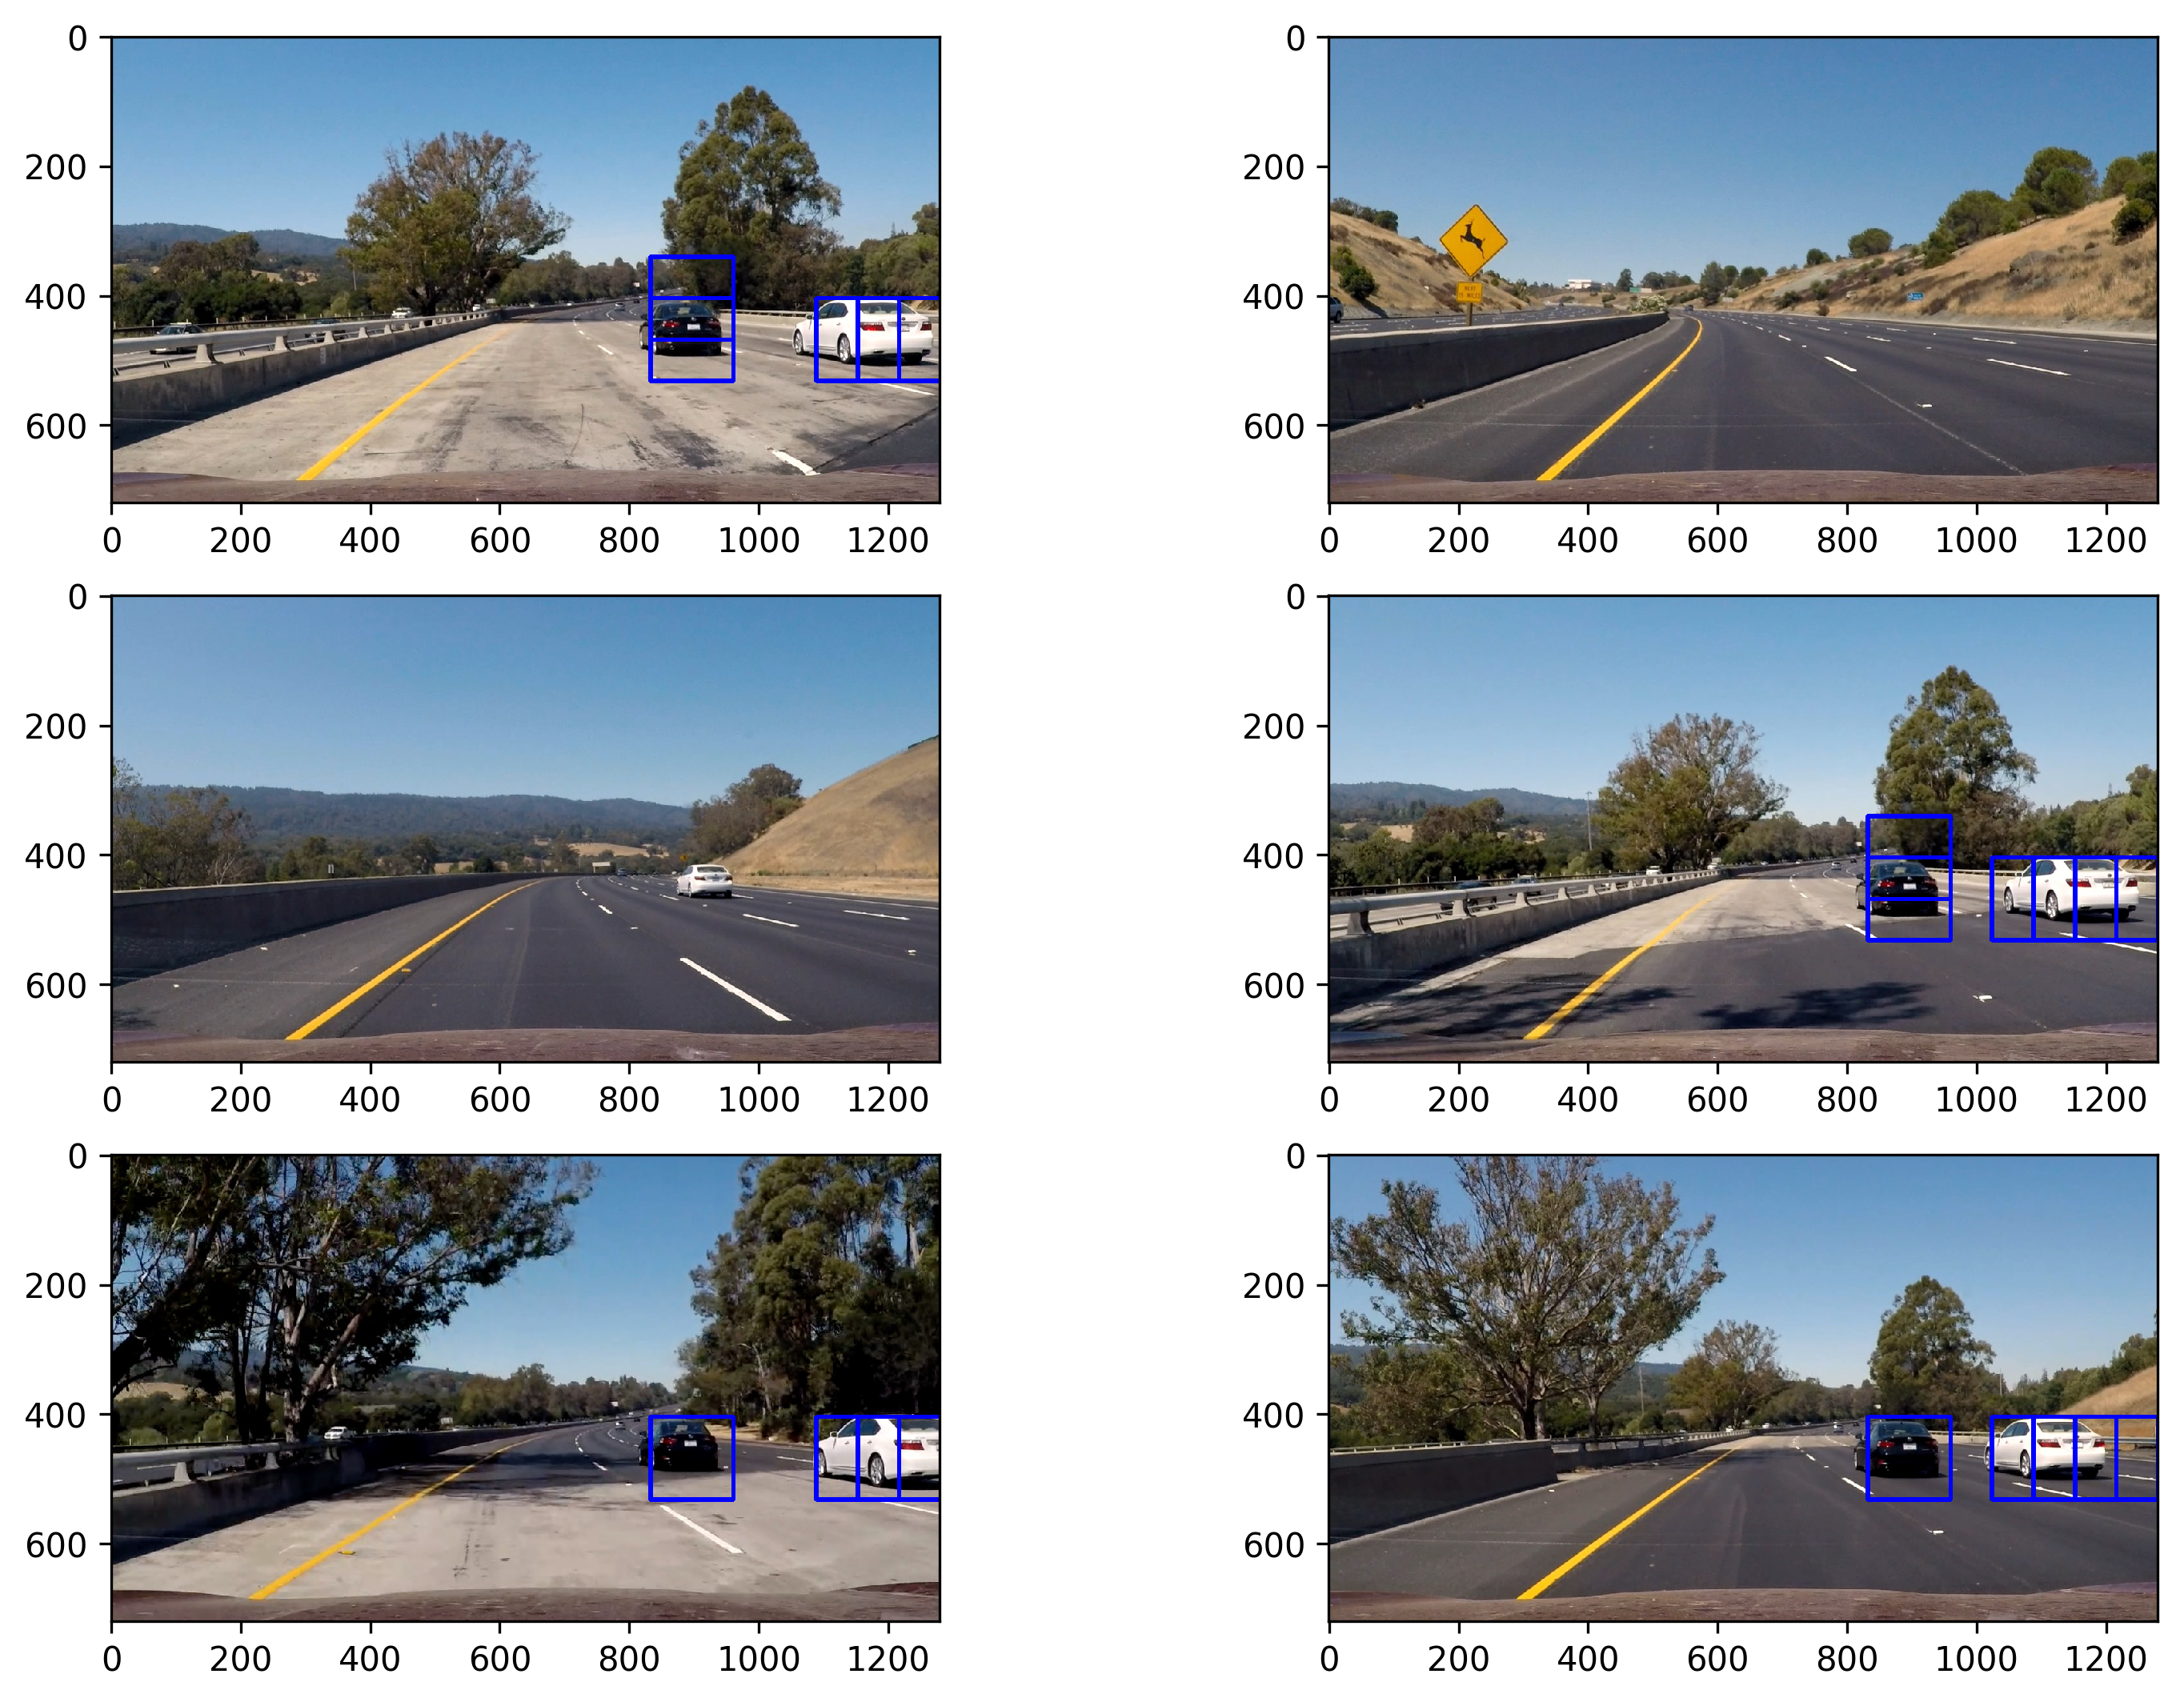

In [8]:
import time

color_space = hog_params["color_space"]
conv_color = hog_params["conv_color"]
orient = hog_params["orient"]
pix_per_cell = hog_params["pix_per_cell"]
cell_per_block = hog_params["cell_per_block"]
hog_channel = hog_params["hog_channel"]
spatial_size = hog_params["spatial_size"]
hist_bins = hog_params["hist_bins"]
spatial_feat = hog_params["spatial_feat"]
hist_feat = hog_params["hist_feat"]
hog_feat = hog_params["hog_feat"]

example_images = glob.glob('test_images/*.jpg')
y_start_stop = [340, 650]  # Min and max in y to search in slide_window()
overlap = 0.5

test_images_list = []
test_title_list = []
cmap_list = []

for img_src in example_images:
    t1 = time.time()
    
    img = mpimg.imread(img_src)
    draw_img = np.copy(img)
    img = img.astype(np.float32) / 255
    print(np.min(img), np.max(img))
    
    windows = slide_window(img, x_start_stop=[None, None], y_start_stop=y_start_stop,
                           xy_window=(128, 128), xy_overlap=(overlap, overlap))
    
    hot_windows = search_windows(img, windows, svc, X_scaler, color_space=color_space,
                             spatial_size=spatial_size, hist_bins=hist_bins,
                             orient=orient, pix_per_cell=pix_per_cell,
                             cell_per_block=cell_per_block,
                             hog_channel=hog_channel, spatial_feat=spatial_feat,
                             hist_feat=hist_feat, hog_feat=hog_feat)
    
    window_img = draw_boxes(draw_img, hot_windows, color=(0, 0, 255), thick=6)
    test_images_list.append(window_img)
    test_title_list.append('')
    cmap_list.append('gray')
    print(time.time() - t1, 'seconds to process one image searching', len(windows), 'windows')
    
fig = plt.figure(figsize=(12, 18), dpi=300)
visualize(fig, len(example_images), 2, test_images_list, test_title_list, cmap_list)

In [ ]:
out_images = []
out_maps = []
out_titles = []
out_boxes = []
out_cmap = []

ystart = 340
ystop = 650
scale = 2

for img_src in example_images:
    img_boxes = []
    t = time.time()
    count = 0
    img = mpimg.imread(img_src)
    draw_img = np.copy(img)
    
    heatmap = np.zeros_like(img[:,:,0])
    img = img.astype(np.float32) / 255
    
    img_tosearch = img[ystart:ystop, :, :]
    ctrans_tosearch = convert_color(img_tosearch)
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), (np.int(imshape[0]/scale))))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]
    
    nxblocks = (ch1.shape[1] // pix_per_cell) - 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - 1
    nfeat_per_block = orient * cell_per_block**2
    
    window = 64
    nblocks_per_window = (window // pix_per_cell) - 1
    cells_per_step = 2
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            count += 1
            ypos = yb * cells_per_step
            xpos = xb * cells_per_step
            
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel()
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel()
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel()
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))
            
            xleft = xpos * pix_per_cell
            ytop = ypos * pix_per_cell
            
            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64, 64))
            
            # Get features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)
            
            features = np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1)
            
            # Scale extracted features to be fed to classifier
            test_features = X_scaler.transform(features)
            # Predict using your classifier
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft * scale)
                ytop_draw = np.int(ytop * scale)
                win_draw = np.int(window * scale)
                cv2.rectangle(draw_img, (xbox_left, ytop_draw+ystart),
                              (xbox_left+win_draw, ytop_draw+win_draw+ystart),
                              (0, 0, 255), 6)
                img_boxes.append(((xbox_left, ytop_draw+ystart),
                                  (xbox_left+win_draw, ytop_draw+win_draw+ystart)))
                heatmap[ytop_draw+ystart:ytop_draw+win_draw+ystart,
                        xbox_left:xbox_left+win_draw] += 1
                
    print(time.time() - t, 'seconds to run, total windows = ', count)
    
    out_images.append(draw_img)
    out_cmap.append('gray')
    out_titles.append(img_src[-9:])
    out_titles.append(img_src[-9:])
    out_images.append(heatmap)
    out_cmap.append('hot')
    out_boxes.append(img_boxes)
        

fig = plt.figure(figsize=(14, 40), dpi=300)
visualize(fig, 2*len(example_images), 2, out_images, out_titles, out_cmap)


In [6]:
def find_cars(img, scale, ystart, ystop):
    heatmap = np.zeros_like(img[: ,: ,0])
    img = img.astype(np.float32) / 255

    img_tosearch = img[ystart:ystop, :, :]
    ctrans_tosearch = convert_color(img_tosearch, conv_color)
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1 ] /scale), (np.int(imshape[0 ] /scale))))

    ch1 = ctrans_tosearch[: ,: ,0]
    ch2 = ctrans_tosearch[: ,: ,1]
    ch3 = ctrans_tosearch[: ,: ,2]

    nxblocks = (ch1.shape[1] // pix_per_cell) - 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - 1

    window = 64
    nblocks_per_window = (window // pix_per_cell) - 1
    cells_per_step = 2
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step

    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)

    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb * cells_per_step
            xpos = xb * cells_per_step

            hog_feat1 = hog1[ypos:ypos +nblocks_per_window, xpos:xpos +nblocks_per_window].ravel()
            hog_feat2 = hog2[ypos:ypos +nblocks_per_window, xpos:xpos +nblocks_per_window].ravel()
            hog_feat3 = hog3[ypos:ypos +nblocks_per_window, xpos:xpos +nblocks_per_window].ravel()
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos * pix_per_cell
            ytop = ypos * pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop +window, xleft:xleft +window], (64, 64))

            # Get features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            features = np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1)

            # Scale extracted features to be fed to classifier
            test_features = X_scaler.transform(features)
            # Predict using your classifier
            test_prediction = svc.predict(test_features)

            test_decision = svc.decision_function(test_features)

            if test_prediction == 1 and test_decision > 0.6:
                xbox_left = np.int(xleft * scale)
                ytop_draw = np.int(ytop * scale)
                win_draw = np.int(window * scale)

                heatmap[ytop_draw +ystart:ytop_draw +win_draw +ystart, xbox_left:xbox_left +win_draw] += 1

    return heatmap

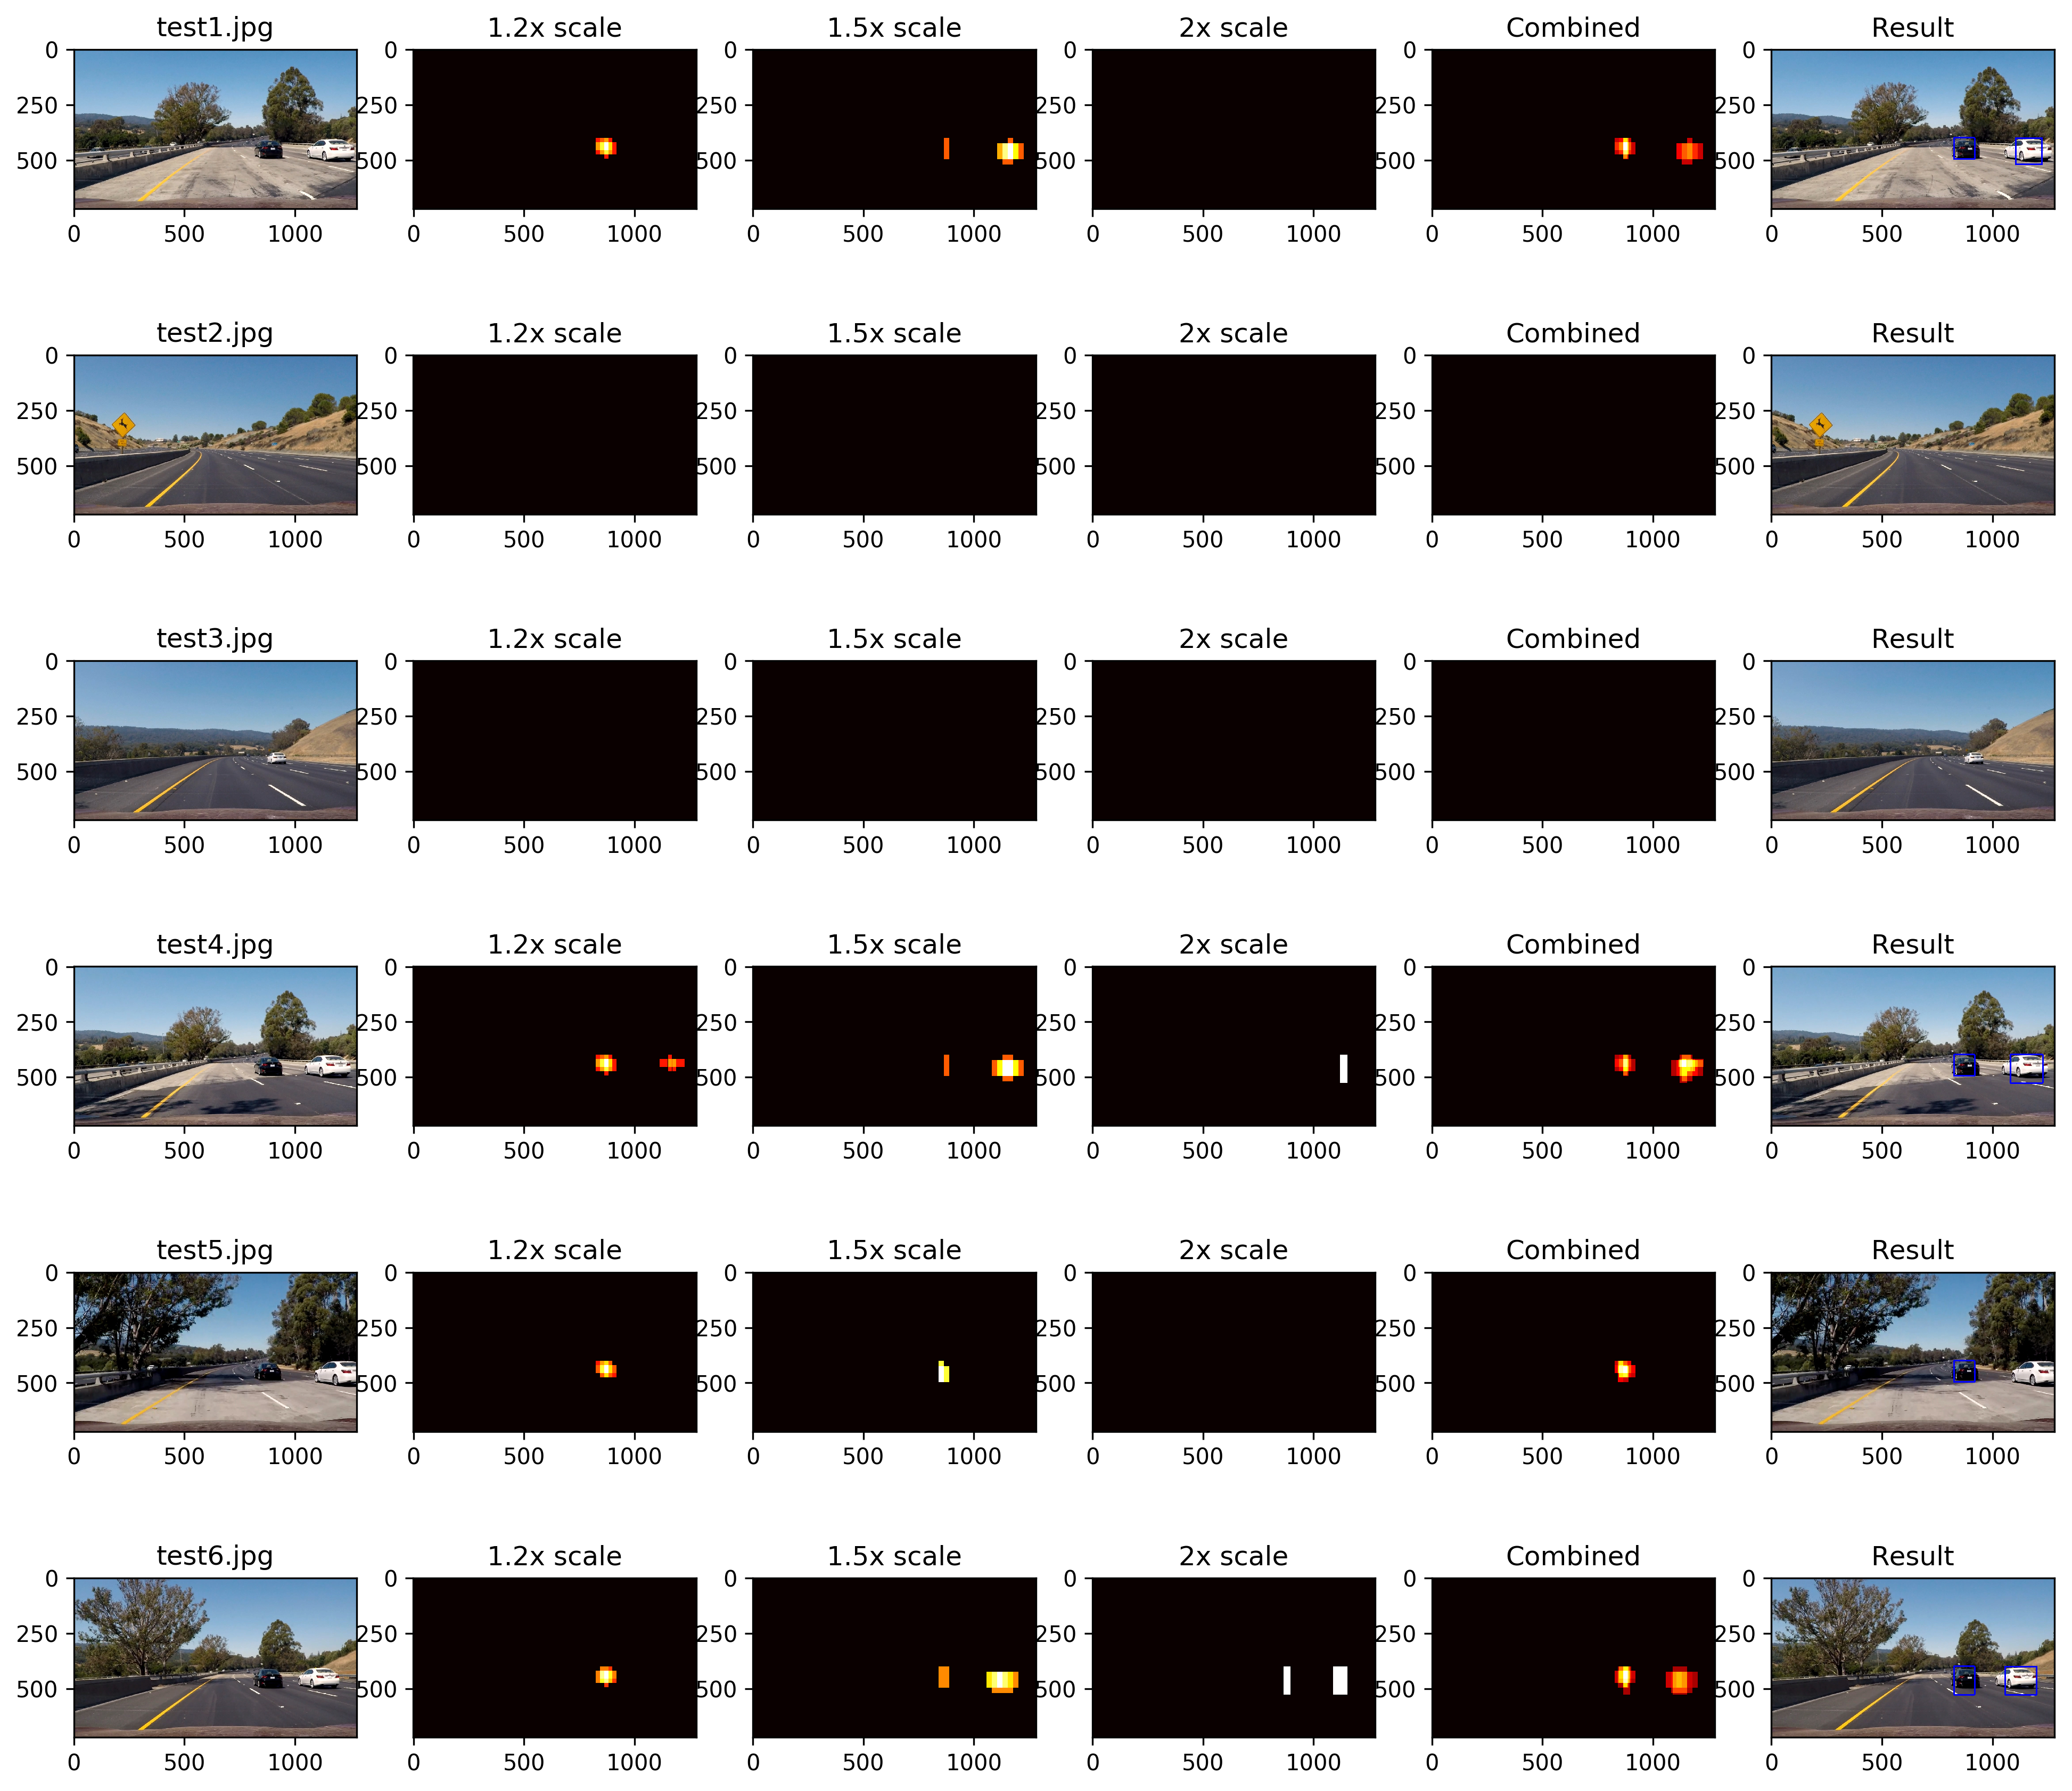

In [13]:
from scipy.ndimage.measurements import label

out_images = []
out_maps = []
out_titles = []
out_boxes = []
out_cmap = []

scaled_regions = [(1.2, 380, 520), (1.5, 400, 600), (2, 400, 660)]
heat_stack = []

for img_src in example_images:
    img = mpimg.imread(img_src)
    
    out_images.append(img)
    out_titles.append(img_src[-9:])
    out_cmap.append('gray')

    heat_map = np.zeros_like(img[: ,: ,0])
    for scaled_region in scaled_regions:
        found_heat_map = find_cars(img, scaled_region[0], scaled_region[1], scaled_region[2])
        thresholded_heat = apply_threshold(found_heat_map, 3)
        
        out_images.append(thresholded_heat)
        out_titles.append(str(scaled_region[0])+'x scale')
        out_cmap.append('hot')
        heat_map += np.asarray(thresholded_heat)

    out_images.append(heat_map)
    out_titles.append('Combined')
    out_cmap.append('hot')

    heat = np.clip(heat_map, 0, 255)
    labels = label(heat)

    draw_img = draw_labeled_bboxes(np.copy(img), labels)
    
    out_images.append(draw_img)
    out_titles.append('Result')
    out_cmap.append('gray')
    
fig = plt.figure(figsize=(16, 30), dpi=300)
visualize(fig, 2*len(example_images), 6, out_images, out_titles, out_cmap)

In [ ]:
def get_labeled_bboxes(img, labels):
    global vehicles
    # Iterate through all detected cars
    for car_number in range(1, labels[1] + 1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        search_key = (np.min(nonzerox), np.min(nonzeroy))

        if len(vehicles) == 0:
            v = Vehicle()
            v.new_detection(nonzerox, nonzeroy)
            vehicles.update({search_key: v})
            #print("new vehicle at", search_key)
        else:
            updated = False
            if search_key in vehicles:
                vehicles[search_key].update_detection(nonzerox, nonzeroy)
                #print("update vehicle at", search_key)
                updated = True
            else:
                index = bisect_left(list(vehicles.keys()), search_key)
                k = []
                if 0 < index < len(vehicles):
                    k_1 = list(vehicles.keys())[index-1]
                    k_2 = list(vehicles.keys())[index]
                    diff_1 = list(abs(np.asarray(k_1) - np.asarray(search_key)))
                    diff_2 = list(abs(np.asarray(k_2) - np.asarray(search_key)))
                    if diff_1 < diff_2:
                        k = k_1
                    else:
                        k = k_2
                elif index == len(vehicles):
                    k = list(vehicles.keys())[index-1]
                else:
                    k = list(vehicles.keys())[0]

                #k = list(vehicles.keys())[index]
                #print("closest key", k, "search key", search_key)

                x_diff = abs(search_key[0] - k[0])
                y_diff = abs(search_key[1] - k[1])
                if x_diff <= 80 and y_diff <= 80:
                    #print("update vehicle at", k, "with new key", search_key)
                    vehicles[k].update_detection(nonzerox, nonzeroy)

                    if x_diff != 0 or y_diff != 0:
                        vehicles[search_key] = vehicles.pop(k)
                        vehicles = OrderedDict(sorted(vehicles.items()))
                        #print(vehicles.keys())
                    updated = True

            if updated is False:
                v = Vehicle()
                v.new_detection(nonzerox, nonzeroy)
                vehicles.update({search_key: v})
                vehicles = OrderedDict(sorted(vehicles.items()))
                #print("add vehicle at", search_key)
                #print(vehicles.keys())

    for _, vehicle in vehicles.items():
        ret, bbox = vehicle.get_bbox()
        if ret is True:
            cv2.rectangle(img, bbox[0], bbox[1], (0, 0, 255), 6)

    # Return the image
    return img

In [ ]:
from utils import *
from collections import OrderedDict
from vehicle import Vehicle

vehicles = OrderedDict()

def process_image(img):
    heat_map = np.zeros_like(img[:, :, 0])
    for scaled_region in scaled_regions:
        found_heat_map = find_cars(img, scaled_region[0], scaled_region[1], scaled_region[2])
        heat_map += np.asarray(found_heat_map)

    heat = apply_threshold(heat_map, 0)
    heat = np.clip(heat, 0, 255)
    labels = label(heat)

    draw_img = get_labeled_bboxes(np.copy(img), labels)
    return draw_img

In [ ]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

video_file = 'test_video.mp4'
track_output = 'track_' + video_file
clip = VideoFileClip(video_file)
track_clip = clip.fl_image(process_image)
track_clip.write_videofile(track_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(track_output))